# 1. Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Scatterplots

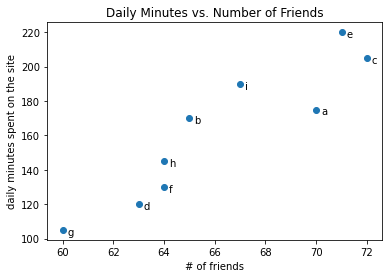

In [2]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label, xy=(friend_count, minute_count), 
                 xytext=(5, -5), 
                 textcoords='offset points')
    
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

## Line charts

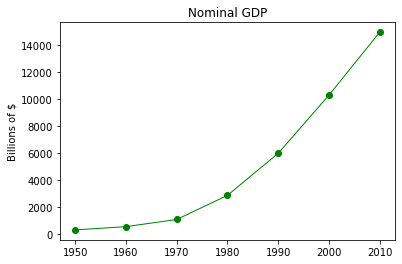

In [3]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color = 'green', marker = 'o', linestyle = 'solid', lw = 1)
plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.show()

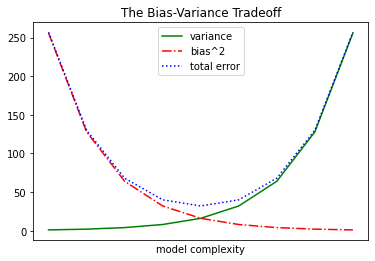

In [4]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs, variance, 'g-', label = 'variance') 
plt.plot(xs, bias_squared, 'r-.', label = 'bias^2') 
plt.plot(xs, total_error, 'b:', label = 'total error')
plt.legend(loc = 9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

## Bar charts

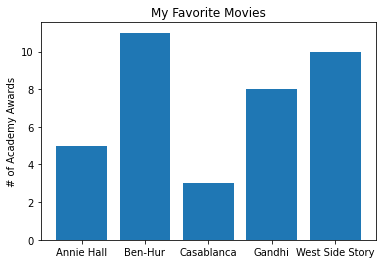

In [5]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

plt.bar(range(len(movies)), num_oscars)
plt.title('My Favorite Movies')
plt.ylabel('# of Academy Awards')
plt.xticks(range(len(movies)), movies)
plt.show()

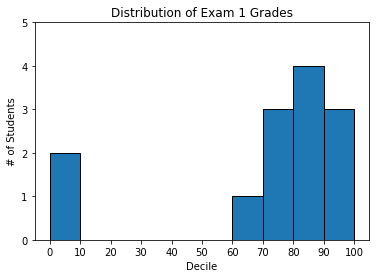

In [6]:
from collections import Counter 

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()], 
        histogram.values(),
        width = 10,
        edgecolor = (0,0,0))
plt.axis([-5, 105, 0, 5])
plt.xticks([10 * i for i in range(11)])
plt.xlabel('Decile')
plt.ylabel('# of Students')
plt.title('Distribution of Exam 1 Grades')
plt.show()

## Histogram

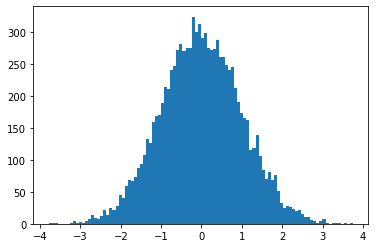

In [7]:
plt.hist(np.random.randn(10000), bins = 100)
plt.show()

## Subplots

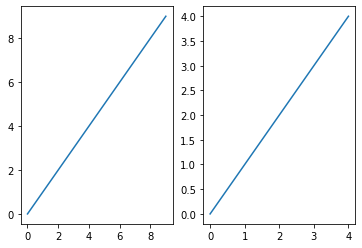

In [8]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(range(10),range(10))
ax[1].plot(range(5),range(5))


## Static 3D

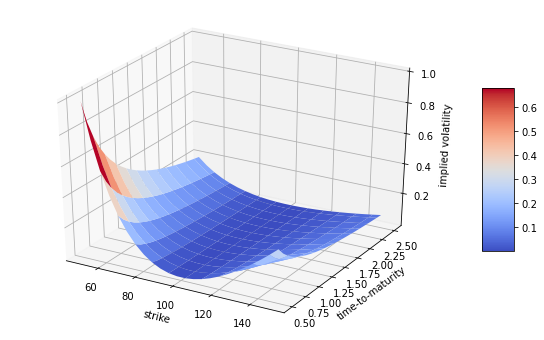

In [9]:
strike = np.linspace(50,150,24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
iv = (strike - 100) ** 2 / (100 * strike) / ttm

fig = plt.figure(figsize = (10, 6)) 
ax = fig.gca(projection='3d') 
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike') 
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility') 
fig.colorbar(surf, shrink=0.5, aspect=5)

# 2. Seaborn

# 3. Bokeh

# 4. Plotly

# 5. Plotnine

# 6. Holoviews

# 7. Datashader

# 8. Kepler.gl

# 9. Cufflinks

In [10]:
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo

In [11]:
plyo.init_notebook_mode(connected = True)

In [14]:
a = np.random.standard_normal((250, 5)).cumsum(axis = 0)
index = pd.date_range('2019-1-1', freq = 'B', periods = len(a))
df = pd.DataFrame(100 + 5 * a, columns = list('abcde'), index = index)
df.head()

,a,b,c,d,e
2019-01-01,97.732148,94.992270,105.359518,95.008453,112.051593
2019-01-02,95.448175,98.663144,107.669895,90.881781,119.546802
2019-01-03,90.442106,95.995024,114.325130,82.898145,118.801935
2019-01-04,90.380171,93.200984,109.628159,79.392030,118.813715
2019-01-07,105.334558,86.797913,98.844703,81.430469,111.819713


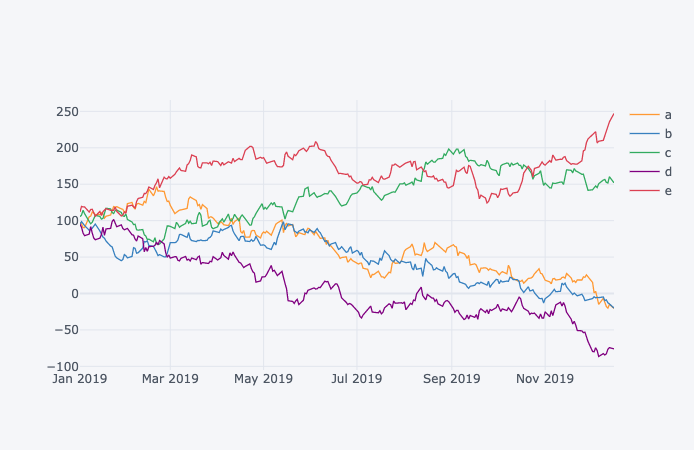

In [15]:
plyo.iplot(df.iplot(asFigure = True),
           filename = 'ply_01')

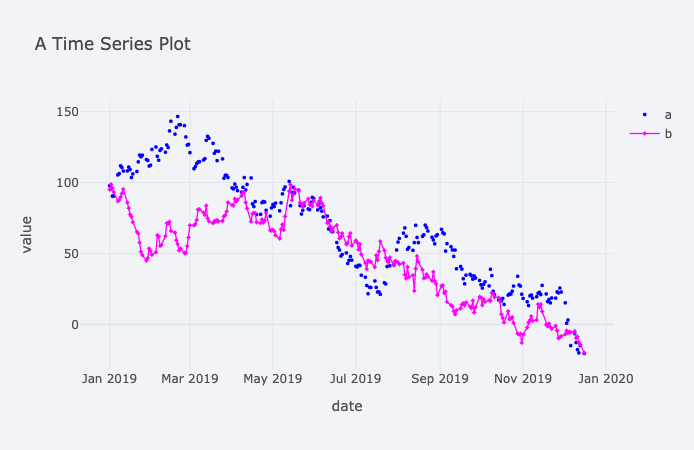

In [16]:
plyo.iplot(
    df[['a', 'b']].iplot(asFigure=True,
                         theme='polar',
                         title='A Time Series Plot',
                         xTitle='date',
                         yTitle='value',
                         mode={'a': 'markers', 'b': 'lines+markers'},
                         symbol={'a': 'circle', 'b': 'diamond'},
                         size=3.5,
                         colors={'a': 'blue', 'b': 'magenta'},
    ),
    # image='png',
    filename='ply_02'
)

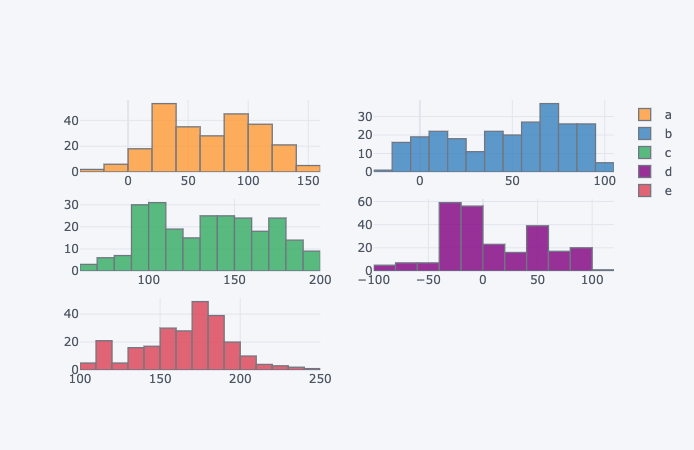

In [17]:
plyo.iplot(
    df.iplot(kind='hist',
             subplots=True,
             bins=15,
             asFigure=True),
    # image='png',
    filename='ply_03'
)

## Financial plots

In [38]:
raw = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi/master/jupyter36/source/fxcm_eur_usd_eod_data.csv',
                  index_col = 0,
                  parse_dates = True)
raw

,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
Date,,,,,,,,,,
2007-06-03,21:00:00,1.34456,1.34986,1.34316,1.34886,1.34474,1.35004,1.34334,1.34904,5259
2007-06-04,21:00:00,1.34886,1.35536,1.34876,1.35226,1.34904,1.35554,1.34894,1.35244,6110
2007-06-05,21:00:00,1.35226,1.35376,1.34846,1.35026,1.35244,1.35394,1.34864,1.35044,5875
2007-06-06,21:00:00,1.35026,1.35116,1.34216,1.34326,1.35044,1.35134,1.34234,1.34344,7361
2007-06-07,21:00:00,1.34326,1.34356,1.33196,1.33676,1.34344,1.34374,1.33214,1.33694,8238
...,...,...,...,...,...,...,...,...,...,...
2017-05-27,21:00:00,1.11784,1.11784,1.11677,1.11681,1.11808,1.11808,1.11743,1.11788,48
2017-05-28,21:00:00,1.11681,1.11894,1.11613,1.11622,1.11788,1.11906,1.11626,1.11660,119787
2017-05-29,21:00:00,1.11622,1.12048,1.11087,1.11842,1.11660,1.12064,1.11100,1.11882,285165


In [39]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2007-06-03 to 2017-05-31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        2820 non-null   object 
 1   OpenBid     2820 non-null   float64
 2   HighBid     2820 non-null   float64
 3   LowBid      2820 non-null   float64
 4   CloseBid    2820 non-null   float64
 5   OpenAsk     2820 non-null   float64
 6   HighAsk     2820 non-null   float64
 7   LowAsk      2820 non-null   float64
 8   CloseAsk    2820 non-null   float64
 9   TotalTicks  2820 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 242.3+ KB


In [41]:
quotes = raw[['OpenAsk','HighAsk','LowAsk','CloseAsk']]
quotes = quotes.iloc[-60:]
quotes.tail()

,OpenAsk,HighAsk,LowAsk,CloseAsk
Date,,,,
2017-05-27,1.11808,1.11808,1.11743,1.11788
2017-05-28,1.11788,1.11906,1.11626,1.11660
2017-05-29,1.11660,1.12064,1.11100,1.11882
2017-05-30,1.11882,1.12530,1.11651,1.12434
2017-05-31,1.12434,1.12574,1.12027,1.12133


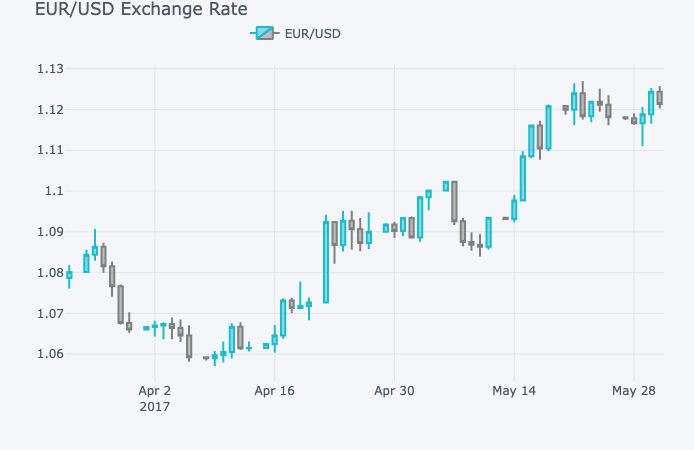

In [42]:
qf = cf.QuantFig(
    quotes,
    title = 'EUR/USD Exchange Rate',
    legend = 'top',
    name = 'EUR/USD')

plyo.iplot(
    qf.iplot(asFigure = True),
    filename = 'qf_01')

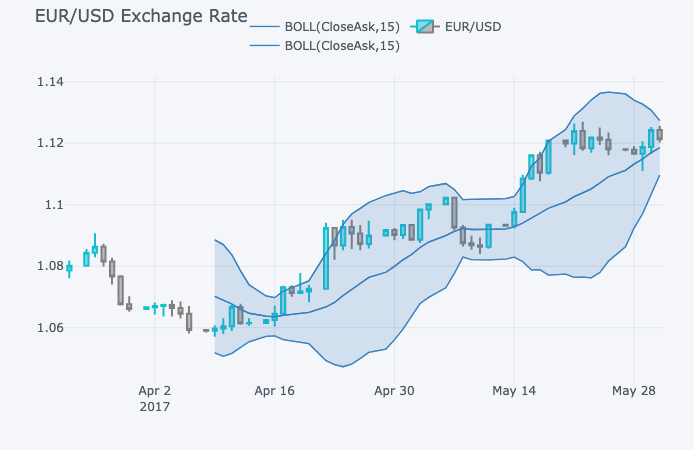

In [44]:
qf.add_bollinger_bands(periods = 15, boll_std = 2)
plyo.iplot(qf.iplot(asFigure = True), filename = 'qf_02')

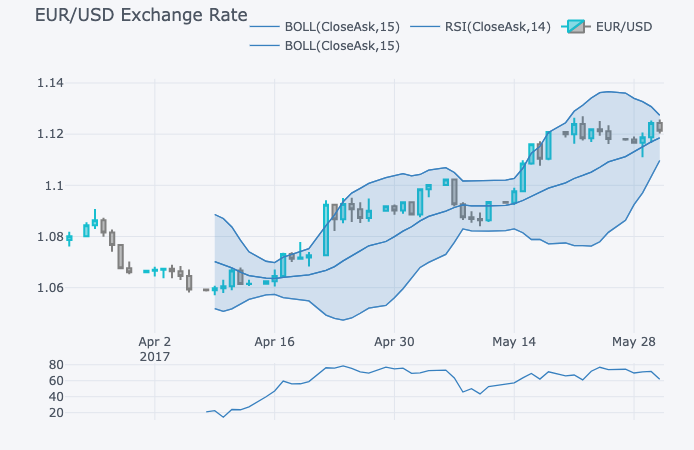

In [45]:
qf.add_rsi(periods = 14, showbands = False)
plyo.iplot(qf.iplot(asFigure = True), filename = 'qf_03')